## Importing Necessary Libraries and Dependencies
---- 

In [2]:
# Import the modules
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

# Filter warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading Data
---

In [3]:
# Read in the CSV file as a Pandas DataFrame
file_path = Path("data/housing_California.csv")
house_price_file_df = pd.read_csv(file_path)

# # Display sample data
house_price_file_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# Check the DataFrame data types
house_price_file_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Data Cleaning
---

In [5]:
# Verify data missing
print(f"Total of missing values is {house_price_file_df.isnull().sum()}")

# Verify duplicate data
print(f"Total of duplicate entries is {house_price_file_df.duplicated().sum()}")

Total of missing values is longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Total of duplicate entries is 0


In [6]:
# Drop data missing
house_price_df = house_price_file_df.dropna()
print(house_price_df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Feature Engineering
---

In [7]:
# New Columns
house_price_df['price_per_room'] = house_price_df['median_house_value'] / house_price_df['total_rooms']
house_price_df['price_per_bedroom'] = house_price_df['median_house_value'] / house_price_df['total_bedrooms']

#Verify New Columns
print(house_price_df[['price_per_room', 'price_per_bedroom']].head())


   price_per_room  price_per_bedroom
0      514.318182        3508.527132
1       50.500070         324.141049
2      240.013633        1853.157895
3      267.896389        1452.340426
4      210.325753        1222.142857


In [8]:
# Creation of dummy variables for the ocean proximity column
ocean_proximity_dummies = pd.get_dummies(house_price_df['ocean_proximity'], drop_first=True)

# Concatenate dummy variables to the original DataFrame
house_price_df = pd.concat([house_price_df, ocean_proximity_dummies], axis=1)

# Remove the original column
house_price_df.drop('ocean_proximity', axis=1, inplace=True)

# Verify New Columns
house_price_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,price_per_room,price_per_bedroom,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,514.318182,3508.527132,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,50.500070,324.141049,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,240.013633,1853.157895,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,267.896389,1452.340426,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,210.325753,1222.142857,False,False,True,False


In [9]:
from sklearn.model_selection import train_test_split

X = house_price_df.drop("median_house_value", axis=1)
y = house_price_df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crie o modelo
model = LinearRegression()

# Treine o modelo
model.fit(X_train, y_train)

# Faça previsões
y_pred = model.predict(X_test)

# Avalie o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4756934620.24939
R-squared: 0.6521483193039486


Tree-Based Models:

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")


Decision Tree MSE: 638053638.9327135
Decision Tree R-squared: 0.9533422154401314


In [13]:
# Initialize the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest MSE: 316731875.23463035
Random Forest R-squared: 0.9768389259206169


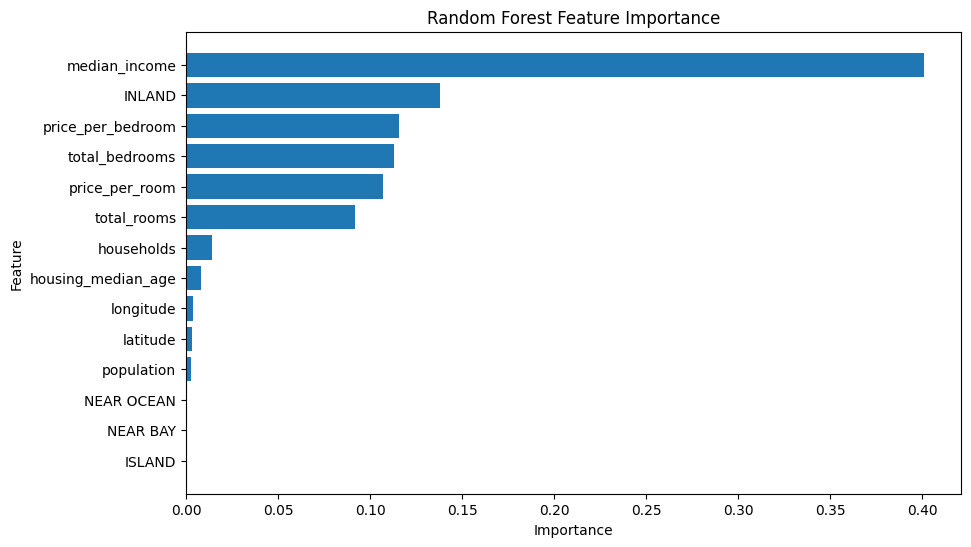

In [14]:
import matplotlib.pyplot as plt

# Get feature importances from the random forest model
feature_importances = random_forest_model.feature_importances_

# Create a dataframe to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV

# Set the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest MSE: {mse_best_rf}")
print(f"Tuned Random Forest R-squared: {r2_best_rf}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.0s
[CV] END max_de